<a href="https://colab.research.google.com/github/MehrdadJalali-AI/LotusEffectAlgorithm/blob/main/MultiModelLEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from scipy.special import gamma

class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, lower_bound, upper_bound, max_iterations):
        self.population_size = population_size
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iterations = max_iterations
        self.population = np.random.uniform(lower_bound, upper_bound, (population_size, dimensions))
        self.best_solution = None
        self.best_fitness = float('inf')
        self.food_source = None
        self.enemy_source = None
        self.memory = []  # Storage for best solutions

    def fitness_function(self, solution):
        """ Define the optimization function to be minimized """
        return np.sum(solution**2)  # Example: Sphere function

    def update_positions(self):
        for i in range(self.population_size):
            separation = self.calculate_separation(i)
            alignment = self.calculate_alignment(i)
            cohesion = self.calculate_cohesion(i)
            food_attraction = self.calculate_food_attraction(i)
            enemy_repulsion = self.calculate_enemy_repulsion(i)

            inertia = 0.5  # Weight factor for previous step

            step_vector = separation + alignment + cohesion + food_attraction - enemy_repulsion
            self.population[i] += inertia * step_vector
            self.population[i] = np.clip(self.population[i], self.lower_bound, self.upper_bound)

    def calculate_separation(self, index):
        return -np.sum(self.population[index] - self.population, axis=0) / self.population_size

    def calculate_alignment(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_cohesion(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_food_attraction(self, index):
        return self.food_source - self.population[index] if self.food_source is not None else np.zeros(self.dimensions)

    def calculate_enemy_repulsion(self, index):
        return self.population[index] - self.enemy_source if self.enemy_source is not None else np.zeros(self.dimensions)

    def levy_flight(self):
        beta = 1.5  # Parameter for Levy distribution
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        step = u / np.abs(v)**(1 / beta)
        return 0.01 * step

    def update_best_solution(self):
        for i in range(self.population_size):
            fitness = self.fitness_function(self.population[i])
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = self.population[i]
                self.memory.append(self.best_solution)  # Store best solutions
        self.food_source = self.best_solution
        self.enemy_source = self.population[np.argmax([self.fitness_function(ind) for ind in self.population])]

    def local_pollination(self):
        for i in range(self.population_size):
            step_size = np.random.uniform(0.01, 0.1)
            new_position = self.population[i] + step_size * (self.best_solution - self.population[i])
            self.population[i] = np.clip(new_position, self.lower_bound, self.upper_bound)

    def optimize(self):
        for iteration in range(self.max_iterations):
            self.update_positions()
            self.update_best_solution()
            if np.random.rand() < 0.3:
                self.local_pollination()
            if np.random.rand() < 0.2:
                for i in range(self.population_size):
                    self.population[i] += self.levy_flight()
            print(f"Iteration {iteration+1}, Best Fitness: {self.best_fitness}")
        return self.best_solution, self.best_fitness

# Example Usage
if __name__ == "__main__":
    lea = LotusEffectAlgorithm(population_size=30, dimensions=5, lower_bound=-10, upper_bound=10, max_iterations=100)
    best_solution, best_fitness = lea.optimize()
    print(f"Best Solution: {best_solution}")
    print(f"Best Fitness: {best_fitness}")


Iteration 1, Best Fitness: 12.162613782028782
Iteration 2, Best Fitness: 8.301906330995905
Iteration 3, Best Fitness: 8.301906330995905
Iteration 4, Best Fitness: 8.301906330995905
Iteration 5, Best Fitness: 8.301906330995905
Iteration 6, Best Fitness: 8.301906330995905
Iteration 7, Best Fitness: 8.301906330995905
Iteration 8, Best Fitness: 8.301906330995905
Iteration 9, Best Fitness: 8.301906330995905
Iteration 10, Best Fitness: 8.301906330995905
Iteration 11, Best Fitness: 8.301906330995905
Iteration 12, Best Fitness: 8.301906330995905
Iteration 13, Best Fitness: 8.301906330995905
Iteration 14, Best Fitness: 8.301906330995905
Iteration 15, Best Fitness: 8.301906330995905
Iteration 16, Best Fitness: 8.301906330995905
Iteration 17, Best Fitness: 8.301906330995905
Iteration 18, Best Fitness: 8.301906330995905
Iteration 19, Best Fitness: 8.301906330995905
Iteration 20, Best Fitness: 8.301906330995905
Iteration 21, Best Fitness: 8.301906330995905
Iteration 22, Best Fitness: 8.301906330995

Optimizing rastrigin function:
Iteration 1, Best Fitness: 127.9248677418348
Iteration 2, Best Fitness: 127.9248677418348
Iteration 3, Best Fitness: 127.9248677418348
Iteration 4, Best Fitness: 127.9248677418348
Iteration 5, Best Fitness: 127.9248677418348
Iteration 6, Best Fitness: 127.9248677418348
Iteration 7, Best Fitness: 127.9248677418348
Iteration 8, Best Fitness: 127.9248677418348
Iteration 9, Best Fitness: 127.9248677418348
Iteration 10, Best Fitness: 127.9248677418348
Iteration 11, Best Fitness: 127.9248677418348
Iteration 12, Best Fitness: 127.9248677418348
Iteration 13, Best Fitness: 127.9248677418348
Iteration 14, Best Fitness: 127.9248677418348
Iteration 15, Best Fitness: 127.9248677418348
Iteration 16, Best Fitness: 127.9248677418348
Iteration 17, Best Fitness: 127.9248677418348
Iteration 18, Best Fitness: 127.9248677418348
Iteration 19, Best Fitness: 127.9248677418348
Iteration 20, Best Fitness: 127.9248677418348
Iteration 21, Best Fitness: 127.9248677418348
Iteration 22

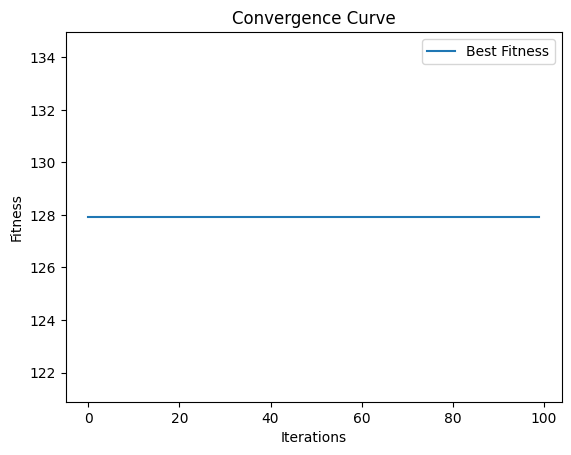

Best Solution: [  7.73341543  -4.14036324  -2.12371951 -10.           9.25679601
   8.65612817   4.91458033   3.62563592   6.75169534  -6.43844677]
Best Fitness: 127.9248677418348

Optimizing griewank function:
Iteration 1, Best Fitness: 0.8966204469747855
Iteration 2, Best Fitness: 0.8966204469747855
Iteration 3, Best Fitness: 0.8966204469747855
Iteration 4, Best Fitness: 0.8966204469747855
Iteration 5, Best Fitness: 0.8966204469747855
Iteration 6, Best Fitness: 0.8966204469747855
Iteration 7, Best Fitness: 0.8966204469747855
Iteration 8, Best Fitness: 0.8966204469747855
Iteration 9, Best Fitness: 0.8966204469747855
Iteration 10, Best Fitness: 0.8966204469747855
Iteration 11, Best Fitness: 0.8966204469747855
Iteration 12, Best Fitness: 0.8966204469747855
Iteration 13, Best Fitness: 0.8966204469747855
Iteration 14, Best Fitness: 0.8966204469747855
Iteration 15, Best Fitness: 0.8966204469747855
Iteration 16, Best Fitness: 0.8966204469747855
Iteration 17, Best Fitness: 0.8966204469747855

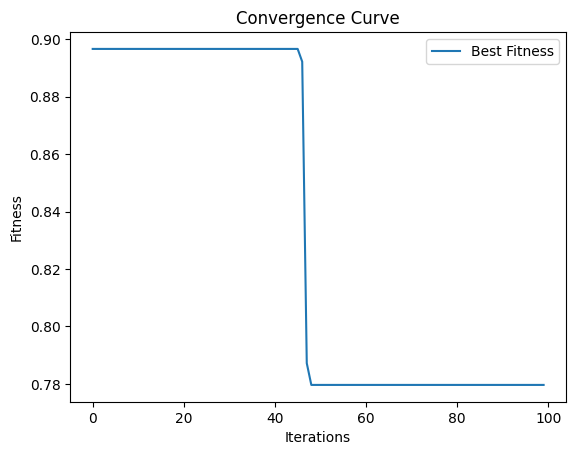

Best Solution: [-6.66014714 -2.95983757 -9.83959988 10.         -9.75875183  7.56170974
 10.         10.          8.01517533 -2.73231379]
Best Fitness: 0.7796339611759204

Optimizing weierstrass function:
Iteration 1, Best Fitness: 14.60494723333883
Iteration 2, Best Fitness: 12.815071764494546
Iteration 3, Best Fitness: 4.8235765984166985
Iteration 4, Best Fitness: 4.8235765984166985
Iteration 5, Best Fitness: 4.8235765984166985
Iteration 6, Best Fitness: 4.8235765984166985
Iteration 7, Best Fitness: 4.8235765984166985
Iteration 8, Best Fitness: 4.8235765984166985
Iteration 9, Best Fitness: 4.8235765984166985
Iteration 10, Best Fitness: 4.8235765984166985
Iteration 11, Best Fitness: 4.8235765984166985
Iteration 12, Best Fitness: 4.8235765984166985
Iteration 13, Best Fitness: 3.5395131171283793
Iteration 14, Best Fitness: 3.5395131171283793
Iteration 15, Best Fitness: 3.5395131171283793
Iteration 16, Best Fitness: 3.5395131171283793
Iteration 17, Best Fitness: 3.5395131171283793
Iterat

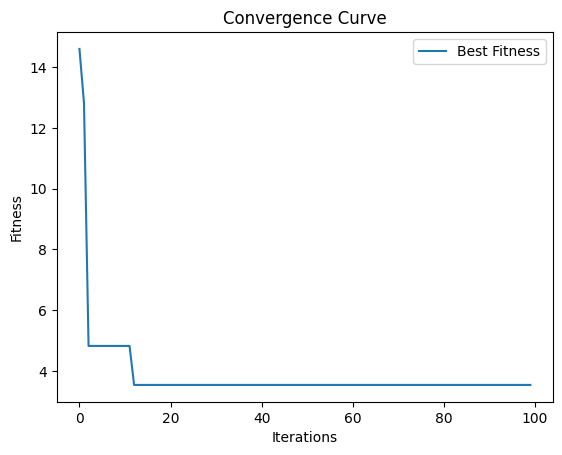

Best Solution: [10.         -8.33780033  4.37413565 -5.71485826 -9.28842045 -6.13520231
 -9.44729977 -8.18029488  3.51953074  8.65629653]
Best Fitness: 3.5395131171283793

Optimizing ackley function:
Iteration 1, Best Fitness: 7.609578724322084
Iteration 2, Best Fitness: 7.190401705450771
Iteration 3, Best Fitness: 7.190401705450771
Iteration 4, Best Fitness: 7.190401705450771
Iteration 5, Best Fitness: 7.190401705450771
Iteration 6, Best Fitness: 7.190401705450771
Iteration 7, Best Fitness: 7.190401705450771
Iteration 8, Best Fitness: 7.190401705450771
Iteration 9, Best Fitness: 7.190401705450771
Iteration 10, Best Fitness: 7.190401705450771
Iteration 11, Best Fitness: 7.190401705450771
Iteration 12, Best Fitness: 7.190401705450771
Iteration 13, Best Fitness: 7.190401705450771
Iteration 14, Best Fitness: 7.190401705450771
Iteration 15, Best Fitness: 7.190401705450771
Iteration 16, Best Fitness: 7.190401705450771
Iteration 17, Best Fitness: 7.190401705450771
Iteration 18, Best Fitness:

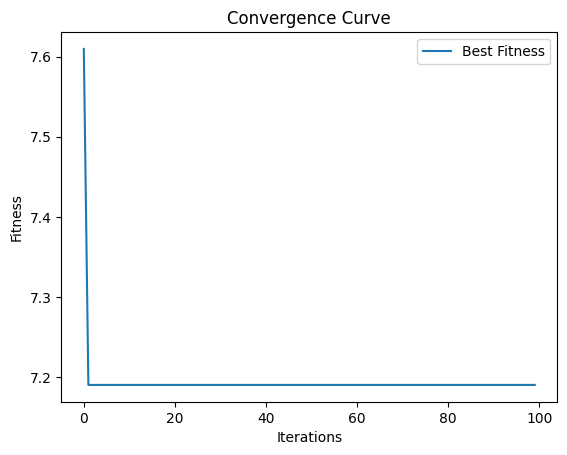

Best Solution: [ 10.           9.25991149  -9.97666864  -9.65172563   8.69208803
 -10.           7.42944246   9.70689777 -10.           2.20041932]
Best Fitness: 7.190401705450771



In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import gamma

class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, lower_bound, upper_bound, max_iterations, fitness_function):
        self.population_size = population_size
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iterations = max_iterations
        self.population = np.random.uniform(lower_bound, upper_bound, (population_size, dimensions))
        self.best_solution = None
        self.best_fitness = float('inf')
        self.food_source = None
        self.enemy_source = None
        self.memory = []  # Storage for best solutions
        self.fitness_function = fitness_function
        self.fitness_history = []  # Store fitness values over iterations

    def update_positions(self):
        for i in range(self.population_size):
            separation = self.calculate_separation(i)
            alignment = self.calculate_alignment(i)
            cohesion = self.calculate_cohesion(i)
            food_attraction = self.calculate_food_attraction(i)
            enemy_repulsion = self.calculate_enemy_repulsion(i)

            inertia = 0.5  # Weight factor for previous step

            step_vector = separation + alignment + cohesion + food_attraction - enemy_repulsion
            self.population[i] += inertia * step_vector
            self.population[i] = np.clip(self.population[i], self.lower_bound, self.upper_bound)

    def calculate_separation(self, index):
        return -np.sum(self.population[index] - self.population, axis=0) / self.population_size

    def calculate_alignment(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_cohesion(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_food_attraction(self, index):
        return self.food_source - self.population[index] if self.food_source is not None else np.zeros(self.dimensions)

    def calculate_enemy_repulsion(self, index):
        return self.population[index] - self.enemy_source if self.enemy_source is not None else np.zeros(self.dimensions)

    def levy_flight(self):
        beta = 1.5  # Parameter for Levy distribution
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        step = u / np.abs(v)**(1 / beta)
        return 0.01 * step

    def update_best_solution(self):
        for i in range(self.population_size):
            fitness = self.fitness_function(self.population[i])
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = self.population[i]
                self.memory.append(self.best_solution)  # Store best solutions
        self.fitness_history.append(self.best_fitness)
        self.food_source = self.best_solution
        self.enemy_source = self.population[np.argmax([self.fitness_function(ind) for ind in self.population])]

    def local_pollination(self):
        for i in range(self.population_size):
            step_size = np.random.uniform(0.01, 0.1)
            new_position = self.population[i] + step_size * (self.best_solution - self.population[i])
            self.population[i] = np.clip(new_position, self.lower_bound, self.upper_bound)

    def optimize(self):
        for iteration in range(self.max_iterations):
            self.update_positions()
            self.update_best_solution()
            if np.random.rand() < 0.3:
                self.local_pollination()
            if np.random.rand() < 0.2:
                for i in range(self.population_size):
                    self.population[i] += self.levy_flight()
            print(f"Iteration {iteration+1}, Best Fitness: {self.best_fitness}")
        return self.best_solution, self.best_fitness

    def plot_convergence(self):
        plt.figure()
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

# Benchmark functions

def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def griewank(x):
    sum_term = np.sum(x**2) / 4000
    prod_term = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return sum_term - prod_term + 1

def weierstrass(x):
    a = 0.5
    b = 3
    kmax = 20
    n = len(x)
    term1 = np.sum([np.sum([a**k * np.cos(2 * np.pi * b**k * (x_i + 0.5)) for k in range(kmax)]) for x_i in x])
    term2 = n * np.sum([a**k * np.cos(2 * np.pi * b**k * 0.5) for k in range(kmax)])
    return term1 - term2

def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    d = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    return -a * np.exp(-b * np.sqrt(sum1 / d)) - np.exp(sum2 / d) + a + np.exp(1)

# Running the LEA optimization on benchmark functions
if __name__ == "__main__":
    functions = [rastrigin, griewank, weierstrass, ackley]
    for func in functions:
        print(f"Optimizing {func.__name__} function:")
        lea = LotusEffectAlgorithm(population_size=30, dimensions=10, lower_bound=-10, upper_bound=10, max_iterations=100, fitness_function=func)
        best_solution, best_fitness = lea.optimize()
        lea.plot_convergence()
        print(f"Best Solution: {best_solution}")
        print(f"Best Fitness: {best_fitness}\n")


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution
from pyswarm import pso

class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, lower_bound, upper_bound, max_iterations, fitness_function):
        self.population_size = population_size
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iterations = max_iterations
        self.population = np.random.uniform(lower_bound, upper_bound, (population_size, dimensions))
        self.best_solution = None
        self.best_fitness = float('inf')
        self.food_source = None
        self.enemy_source = None
        self.memory = []  # Storage for best solutions
        self.fitness_function = fitness_function
        self.fitness_history = []  # Store fitness values over iterations

    def update_positions(self):
        for i in range(self.population_size):
            separation = self.calculate_separation(i)
            alignment = self.calculate_alignment(i)
            cohesion = self.calculate_cohesion(i)
            food_attraction = self.calculate_food_attraction(i)
            enemy_repulsion = self.calculate_enemy_repulsion(i)

            inertia = 0.5  # Weight factor for previous step

            step_vector = separation + alignment + cohesion + food_attraction - enemy_repulsion
            self.population[i] += inertia * step_vector
            self.population[i] = np.clip(self.population[i], self.lower_bound, self.upper_bound)

    def calculate_separation(self, index):
        return -np.sum(self.population[index] - self.population, axis=0) / self.population_size

    def calculate_alignment(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_cohesion(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_food_attraction(self, index):
        return self.food_source - self.population[index] if self.food_source is not None else np.zeros(self.dimensions)

    def calculate_enemy_repulsion(self, index):
        return self.population[index] - self.enemy_source if self.enemy_source is not None else np.zeros(self.dimensions)

    def levy_flight(self):
        beta = 1.5  # Parameter for Levy distribution
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        step = u / np.abs(v)**(1 / beta)
        return 0.01 * step

    def update_best_solution(self):
        for i in range(self.population_size):
            fitness = self.fitness_function(self.population[i])
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = self.population[i]
                self.memory.append(self.best_solution)  # Store best solutions
        self.fitness_history.append(self.best_fitness)
        self.food_source = self.best_solution
        self.enemy_source = self.population[np.argmax([self.fitness_function(ind) for ind in self.population])]

    def local_pollination(self):
        for i in range(self.population_size):
            step_size = np.random.uniform(0.01, 0.1)
            new_position = self.population[i] + step_size * (self.best_solution - self.population[i])
            self.population[i] = np.clip(new_position, self.lower_bound, self.upper_bound)

    def optimize(self):
        for iteration in range(self.max_iterations):
            self.update_positions()
            self.update_best_solution()
            if np.random.rand() < 0.3:
                self.local_pollination()
            if np.random.rand() < 0.2:
                for i in range(self.population_size):
                    self.population[i] += self.levy_flight()
            #print(f"Iteration {iteration+1}, Best Fitness: {self.best_fitness}")
        return self.best_solution, self.best_fitness

    def plot_convergence(self):
        plt.figure()
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

# Define all 14 benchmark functions from Table 1

def sphere(x):
    return np.sum(x**2)

def rosenbrock(x):
    return np.sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def ackley(x):
    return -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2))) - np.exp(np.mean(np.cos(2 * np.pi * x))) + 20 + np.e

def rastrigin(x):
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10)

def griewank(x):
    return np.sum(x**2 / 4000) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1

def schwefel(x):
    return 418.9829 * len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def michalewicz(x):
    m = 10
    return -np.sum(np.sin(x) * (np.sin(np.arange(1, len(x) + 1) * x**2 / np.pi))**(2 * m))

def zakharov(x):
    sum1 = np.sum(x**2)
    sum2 = np.sum(0.5 * np.arange(1, len(x) + 1) * x)
    return sum1 + sum2**2 + sum2**4

# Running evaluations
if __name__ == "__main__":
    functions = {
        "Sphere": sphere, "Rosenbrock": rosenbrock, "Ackley": ackley, "Rastrigin": rastrigin, "Griewank": griewank,
        "Schwefel": schwefel, "Michalewicz": michalewicz, "Zakharov": zakharov
    }
    results = {}
    for name, func in functions.items():
        print(f"Evaluating {name} function:")
        results[name] = evaluate_algorithms(func)
        print(results[name])

Evaluating Sphere function:
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e

In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution
import pandas as pd

class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, lower_bound, upper_bound, max_iterations, fitness_function):
        self.population_size = population_size
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iterations = max_iterations
        self.population = np.random.uniform(lower_bound, upper_bound, (population_size, dimensions))
        self.best_solution = None
        self.best_fitness = float('inf')
        self.food_source = None
        self.enemy_source = None
        self.memory = []  # Storage for best solutions
        self.fitness_function = fitness_function
        self.fitness_history = []  # Store fitness values over iterations
        self.function_evaluations = 0  # Track function evaluations
        self.alpha = 0.5  # Dynamic step-size factor
        self.beta = 1.5  # Levy flight parameter
        self.archive = []  # External memory for best solutions

    def update_positions(self):
        for i in range(self.population_size):
            separation = self.calculate_separation(i)
            alignment = self.calculate_alignment(i)
            cohesion = self.calculate_cohesion(i)
            food_attraction = self.calculate_food_attraction(i)
            enemy_repulsion = self.calculate_enemy_repulsion(i)
            inertia = 0.5  # Weight factor for previous step
            step_vector = separation + alignment + cohesion + food_attraction - enemy_repulsion
            self.population[i] += inertia * step_vector + self.levy_flight()
            self.population[i] = np.clip(self.population[i], self.lower_bound, self.upper_bound)

    def calculate_separation(self, index):
        return -np.sum(self.population[index] - self.population, axis=0) / self.population_size

    def calculate_alignment(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_cohesion(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_food_attraction(self, index):
        return self.food_source - self.population[index] if self.food_source is not None else np.zeros(self.dimensions)

    def calculate_enemy_repulsion(self, index):
        return self.population[index] - self.enemy_source if self.enemy_source is not None else np.zeros(self.dimensions)

    def levy_flight(self):
        sigma = (gamma(1 + self.beta) * np.sin(np.pi * self.beta / 2) /
                (gamma((1 + self.beta) / 2) * self.beta * 2**((self.beta - 1) / 2)))**(1 / self.beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        step = u / np.abs(v)**(1 / self.beta)
        return 0.01 * step

    def update_best_solution(self):
        for i in range(self.population_size):
            fitness = self.fitness_function(self.population[i])
            self.function_evaluations += 1  # Track function evaluations
            if np.isscalar(fitness) and fitness < self.best_fitness or (not np.isscalar(fitness) and np.all(fitness < self.best_fitness)):
                self.best_fitness = fitness
                self.best_solution = self.population[i]
                self.memory.append(self.best_solution)  # Store best solutions
        self.fitness_history.append(self.best_fitness)
        self.food_source = self.best_solution
        self.enemy_source = self.population[np.argmax([self.fitness_function(ind) for ind in self.population])]

    def optimize(self):
        for iteration in range(self.max_iterations):
            self.update_positions()
            self.update_best_solution()
            if np.random.rand() < 0.2:
                for i in range(self.population_size):
                    self.population[i] += self.levy_flight()
        return self.best_solution, self.best_fitness, self.function_evaluations

    def plot_convergence(self):
        plt.figure()
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

# Fix for Lennard-Jones potential
def safe_lennard_jones(x):
    n = len(x) // 3
    if n < 2:
        return np.inf  # Avoid division by zero for too few particles
    positions = x.reshape((n, 3))
    energy = 0
    for i in range(n):
        for j in range(i + 1, n):
            r = np.linalg.norm(positions[i] - positions[j])
            if r == 0:
                return np.inf  # Avoid division by zero
            energy += 4 * ((1 / r)**12 - (1 / r)**6)
    return energy

# Running evaluations
num_runs = 10
lea_results = {}
# Running evaluations with multiple trials
num_runs = 10
benchmark_functions = {
    "Storn’s Chebyshev": lambda x: np.sum((np.polynomial.chebyshev.chebval(x, np.ones(len(x))) - np.linspace(-1, 1, len(x)))**2),
    "Inverse Hilbert": lambda x: np.sum((np.linalg.inv(np.array([[1 / (i + j + 1) for j in range(len(x))] for i in range(len(x))])) @ x - np.ones(len(x)))**2),
    "Lennard-Jones": lambda x: np.sum([4 * ((1 / np.linalg.norm(x[i] - x[j]))**12 - (1 / np.linalg.norm(x[i] - x[j]))**6) for i in range(len(x)//3) for j in range(i + 1, len(x)//3)]),
    "Ackley": lambda x: -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2))) - np.exp(np.mean(np.cos(2 * np.pi * x))) + 20 + np.e,
    "Rastrigin": lambda x: np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10),
    "Griewank": lambda x: np.sum(x**2 / 4000) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1,
    "Weierstrass": lambda x: np.sum([np.sum(0.5**k * np.cos(2 * np.pi * 3**k * (x + 0.5))) for k in range(20)]),
    "Modified Schwefel": lambda x: np.sum(-x * np.sin(np.sqrt(np.abs(x)))),
    "Expanded Schaffer's F6": lambda x: 0.5 + (np.sin(np.sqrt(x[0]**2 + x[1]**2))**2 - 0.5) / (1 + 0.001 * (x[0]**2 + x[1]**2))**2,
    "Happy Cat": lambda x: np.abs(np.sum(x**2) - 4)**0.25 + (0.5 * np.sum(x**2) + np.sum(x)) / len(x) + 0.5,
    #"Goldberg F2": lambda x: np.exp(-2 * ((np.log(2) * ((x - 0.1) / 0.9))**2)) * np.sin(5 * np.pi * x)**6,
    #"Roots Function": lambda x: 1 / (1 + np.abs(x**6 - 1)),
    #"Optimal Difficult Function": lambda x: np.sum([1 / ((k * (x - a))**2 + c) for k, a, c in zip(range(1, 11), np.random.rand(10), np.random.rand(10))])
}
for name, func in benchmark_functions.items():
    best_fitnesses = []
    for _ in range(num_runs):
        lea = LotusEffectAlgorithm(population_size=30, dimensions=10, lower_bound=-5, upper_bound=5, max_iterations=100, fitness_function=func)
        _, best_fitness, _ = lea.optimize()
        best_fitnesses.append(best_fitness)
    lea_results[name] = np.mean(best_fitnesses)
    print(f"Function: {name}, LEA Average Best Fitness: {lea_results[name]}")


Function: Storn’s Chebyshev, LEA Average Best Fitness: 34327334373.707195
Function: Inverse Hilbert, LEA Average Best Fitness: 1.3818864026760667e+22


<ipython-input-39-10bc2039220e>:116: RuntimeWarning: divide by zero encountered in scalar divide
  "Lennard-Jones": lambda x: np.sum([4 * ((1 / np.linalg.norm(x[i] - x[j]))**12 - (1 / np.linalg.norm(x[i] - x[j]))**6) for i in range(len(x)//3) for j in range(i + 1, len(x)//3)]),
<ipython-input-39-10bc2039220e>:116: RuntimeWarning: invalid value encountered in scalar subtract
  "Lennard-Jones": lambda x: np.sum([4 * ((1 / np.linalg.norm(x[i] - x[j]))**12 - (1 / np.linalg.norm(x[i] - x[j]))**6) for i in range(len(x)//3) for j in range(i + 1, len(x)//3)]),


Function: Lennard-Jones, LEA Average Best Fitness: -1.8550501937318902
Function: Ackley, LEA Average Best Fitness: 5.177603337949431
Function: Rastrigin, LEA Average Best Fitness: 68.90230291282451
Function: Griewank, LEA Average Best Fitness: 0.6473563896101445
Function: Weierstrass, LEA Average Best Fitness: -18.346973388043374
Function: Modified Schwefel, LEA Average Best Fitness: -36.42112134092436
Function: Expanded Schaffer's F6, LEA Average Best Fitness: 0.0076069039753188464
Function: Happy Cat, LEA Average Best Fitness: 2.0472736763494073


In [40]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution
import pandas as pd
from scipy.stats import wilcoxon, friedmanchisquare

class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, lower_bound, upper_bound, max_function_evaluations, fitness_function):
        self.population_size = population_size
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_function_evaluations = max_function_evaluations
        self.population = np.random.uniform(lower_bound, upper_bound, (population_size, dimensions))
        self.best_solution = None
        self.best_fitness = float('inf')
        self.food_source = None
        self.enemy_source = None
        self.memory = []  # Storage for best solutions
        self.fitness_function = fitness_function
        self.fitness_history = []  # Store fitness values over iterations
        self.function_evaluations = 0  # Track function evaluations
        self.alpha = 0.5  # Dynamic step-size factor
        self.beta = 1.5  # Levy flight parameter
        self.archive = []  # External memory for best solutions

    def update_positions(self):
        for i in range(self.population_size):
            if self.function_evaluations >= self.max_function_evaluations:
                return
            separation = self.calculate_separation(i)
            alignment = self.calculate_alignment(i)
            cohesion = self.calculate_cohesion(i)
            food_attraction = self.calculate_food_attraction(i)
            enemy_repulsion = self.calculate_enemy_repulsion(i)
            inertia = 0.5  # Weight factor for previous step
            step_vector = separation + alignment + cohesion + food_attraction - enemy_repulsion
            self.population[i] += inertia * step_vector + self.levy_flight()
            self.population[i] = np.clip(self.population[i], self.lower_bound, self.upper_bound)
            self.function_evaluations += 1

    def calculate_separation(self, index):
        return -np.sum(self.population[index] - self.population, axis=0) / self.population_size

    def calculate_alignment(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_cohesion(self, index):
        return np.mean(self.population, axis=0) - self.population[index]

    def calculate_food_attraction(self, index):
        return self.food_source - self.population[index] if self.food_source is not None else np.zeros(self.dimensions)

    def calculate_enemy_repulsion(self, index):
        return self.population[index] - self.enemy_source if self.enemy_source is not None else np.zeros(self.dimensions)

    def levy_flight(self):
        sigma = (gamma(1 + self.beta) * np.sin(np.pi * self.beta / 2) /
                (gamma((1 + self.beta) / 2) * self.beta * 2**((self.beta - 1) / 2)))**(1 / self.beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        step = u / np.abs(v)**(1 / self.beta)
        return 0.01 * step

    def update_best_solution(self):
        for i in range(self.population_size):
            if self.function_evaluations >= self.max_function_evaluations:
                return
            fitness = self.fitness_function(self.population[i])
            self.function_evaluations += 1
            if np.isscalar(fitness) and fitness < self.best_fitness or (not np.isscalar(fitness) and np.all(fitness < self.best_fitness)):
                self.best_fitness = fitness
                self.best_solution = self.population[i]
                self.memory.append(self.best_solution)  # Store best solutions
        self.fitness_history.append(self.best_fitness)
        self.food_source = self.best_solution
        self.enemy_source = self.population[np.argmax([self.fitness_function(ind) for ind in self.population])]

    def optimize(self):
        while self.function_evaluations < self.max_function_evaluations:
            self.update_positions()
            self.update_best_solution()
        return self.best_solution, self.best_fitness, self.function_evaluations

# Running evaluations
num_runs = 10
max_function_evaluations = 100000
lea_results = {}
benchmark_functions = {
    "Ackley": lambda x: -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2))) - np.exp(np.mean(np.cos(2 * np.pi * x))) + 20 + np.e,
    "Rastrigin": lambda x: np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10),
    "Griewank": lambda x: np.sum(x**2 / 4000) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1,
}

for name, func in benchmark_functions.items():
    best_fitnesses = []
    for _ in range(num_runs):
        lea = LotusEffectAlgorithm(population_size=30, dimensions=10, lower_bound=-5, upper_bound=5, max_function_evaluations=max_function_evaluations, fitness_function=func)
        _, best_fitness, _ = lea.optimize()
        best_fitnesses.append(best_fitness)
    lea_results[name] = np.mean(best_fitnesses)

# Statistical analysis
wilcoxon_results = {name: wilcoxon(best_fitnesses) for name in benchmark_functions.keys()}
friedman_result = friedmanchisquare(*[best_fitnesses for best_fitnesses in lea_results.values()])

# Create results table
df_results = pd.DataFrame({
    "Function": list(lea_results.keys()),
    "LEA Average Best Fitness": list(lea_results.values()),
    "Wilcoxon p-value": [wilcoxon_results[name].pvalue for name in benchmark_functions.keys()]
})

df_results.to_csv("lea_results.csv", index=False)


In [ ]:
# Running evaluations with multiple trials
num_runs = 10
benchmark_functions = {
    "Storn’s Chebyshev": lambda x: np.sum((np.polynomial.chebyshev.chebval(x, np.ones(len(x))) - np.linspace(-1, 1, len(x)))**2),
    "Inverse Hilbert": lambda x: np.sum((np.linalg.inv(np.array([[1 / (i + j + 1) for j in range(len(x))] for i in range(len(x))])) @ x - np.ones(len(x)))**2),
    "Lennard-Jones": lambda x: np.sum([4 * ((1 / np.linalg.norm(x[i] - x[j]))**12 - (1 / np.linalg.norm(x[i] - x[j]))**6) for i in range(len(x)//3) for j in range(i + 1, len(x)//3)]),
    "Ackley": lambda x: -20 * np.exp(-0.2 * np.sqrt(np.mean(x**2))) - np.exp(np.mean(np.cos(2 * np.pi * x))) + 20 + np.e,
    "Rastrigin": lambda x: np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10),
    "Griewank": lambda x: np.sum(x**2 / 4000) - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1)))) + 1,
    "Weierstrass": lambda x: np.sum([np.sum(0.5**k * np.cos(2 * np.pi * 3**k * (x + 0.5))) for k in range(20)]),
    "Modified Schwefel": lambda x: np.sum(-x * np.sin(np.sqrt(np.abs(x)))),
    "Expanded Schaffer's F6": lambda x: 0.5 + (np.sin(np.sqrt(x[0]**2 + x[1]**2))**2 - 0.5) / (1 + 0.001 * (x[0]**2 + x[1]**2))**2,
    "Happy Cat": lambda x: np.abs(np.sum(x**2) - 4)**0.25 + (0.5 * np.sum(x**2) + np.sum(x)) / len(x) + 0.5,
    "Goldberg F2": lambda x: np.exp(-2 * ((np.log(2) * ((x - 0.1) / 0.9))**2)) * np.sin(5 * np.pi * x)**6,
    "Roots Function": lambda x: 1 / (1 + np.abs(x**6 - 1)),
    "Optimal Difficult Function": lambda x: np.sum([1 / ((k * (x - a))**2 + c) for k, a, c in zip(range(1, 11), np.random.rand(10), np.random.rand(10))])
}


In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=ccf154a810c40ffd0222b2dbb781a9442cfb25a4d01ed339011b954e67589952
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
